In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('resultat_DPO_summarization.xlsx')
df.head()

,Temperature,Win rate,Avg KL,Time spent
0,0.25,0.50,0.3809,55
1,0.00,NaN,NaN,NaN
2,1.00,0.48,0.0140,57
3,0.80,0.48,1.0331,48 min
4,0.25,0.54,1.0280,58 min


   Temperature  win_mean   win_std   avg_kl
0         0.00       NaN       NaN      NaN
1         0.25      0.52  0.028284  0.70445
2         0.80      0.48       NaN  1.03310
3         1.00      0.48       NaN  0.01400


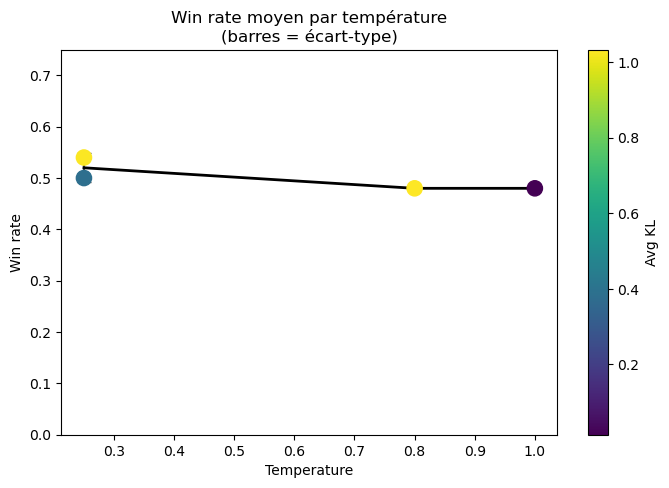

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# --------------------------------------------------
# 1. Préparation des données
# --------------------------------------------------

# On enlève les NaN et on trie pour une ligne propre
df_plot = (
    df
    .dropna(subset=["Win rate", "Win rate std", "Avg KL"])
    .sort_values("Temperature")
)

temperatures = df_plot["Temperature"]
win_mean = df_plot["Win rate"]
win_std = df_plot["Win rate std"]
avg_kl = df_plot["Avg KL"]

# Normalisation pour la colormap
norm = mcolors.Normalize(
    vmin=avg_kl.min(),
    vmax=avg_kl.max()
)

# --------------------------------------------------
# 2. Création de la figure
# --------------------------------------------------

plt.figure(figsize=(8, 5))

# --- Bande ± écart-type (variabilité) ---
plt.fill_between(
    temperatures,
    win_mean - win_std,
    win_mean + win_std,
    color="black",
    alpha=0.15,
    linewidth=0,
    zorder=1
)

# --- Ligne des moyennes ---
plt.plot(
    temperatures,
    win_mean,
    color="black",
    linewidth=2,
    zorder=2,
    label="Mean win rate"
)

# --- Points (colorés par Avg KL) ---
scatter = plt.scatter(
    temperatures,
    win_mean,
    c=avg_kl,
    cmap="viridis",
    norm=norm,
    s=120,
    edgecolor="black",
    linewidth=0.5,
    zorder=3
)

# --------------------------------------------------
# 3. Habillage
# --------------------------------------------------

cbar = plt.colorbar(scatter)
cbar.set_label("Average KL", rotation=270, labelpad=15)

plt.xlabel("Temperature")
plt.ylabel("Win rate")
plt.title("Win rate vs Temperature\n(shaded area = ± std)")
plt.ylim(0, 0.75)

plt.tight_layout()
plt.show()
